# Make linear regression plots

Based on Michael Galarnyk's LinkedIn Learning course, "Machine Learning with Scikit Learn" and Lillian Pierson's "Python for Data Science Essential Training Part 1", using data from my own weight-loss spreadsheet.

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

from pandas import Series, DataFrame

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Read input, convert to dataframe

In [30]:
address = './Weights.xlsx'
weight_chart = pd.read_excel(address)
df_ori = DataFrame(weight_chart)
df = df_ori.iloc[:, 0:4].dropna()
df.head()

,Date,Date (num),Wt,BMI
0,2020-07-08,44020,204.9,27.030343
1,2020-07-09,44021,204.4,26.964384
2,2020-07-10,44022,203.8,26.885232
3,2020-07-11,44023,202.4,26.700544
4,2020-07-12,44024,203.4,26.832464


### Arrange Data into Features Matrix and Target Vector

In [48]:
# Convert x column to numpy array   This is straight from Galarnyk
X = df.loc[:, ['Date (num)']].values # type(X) = numpy.ndarray
X_string = df.loc[:, ['Date']].values
X_string[:5]

array([['2020-07-08T00:00:00.000000000'],
       ['2020-07-09T00:00:00.000000000'],
       ['2020-07-10T00:00:00.000000000'],
       ['2020-07-11T00:00:00.000000000'],
       ['2020-07-12T00:00:00.000000000']], dtype='datetime64[ns]')

In [32]:
# Features Matrix needs to be at 2 dimensional
X.shape

(927, 1)

In [33]:
y = df.loc[:, 'Wt'].values
y.shape

(927,)

### Linear Regression
<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes.

In [34]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.linear_model import LinearRegression

<b>Step 2:</b> Make an instance of the Model

This is a place where you can tune the hyperparameters of a model. In the case of linear regression, you can set `fit_intercept` to True or False depending on your needs. This is an important concept as more complex models have a lot more you can tune. 

In [35]:
# Make a linear regression instance
reg = LinearRegression(fit_intercept=True)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

In [37]:
# Model learns the relationship between x and y
reg.fit(X,y)

LinearRegression()

<b>Step 4:</b> Predict the values of new data. Uses the information the model learned during the model training process

Predict for One Observation

In [39]:
# Input needs to be two dimensional (reshape makes input two dimensional )
reg.predict(X[0].reshape(-1,1))

array([201.1555687])

Predict for Multiple Observations at Once

In [40]:
reg.predict(X[0:10])

array([201.1555687 , 201.14657894, 201.13758919, 201.12859944,
       201.11960968, 201.10163018, 201.08365067, 201.07466092,
       201.05668141, 201.0387019 ])

## Measuring Model Performance

Unlike classification models where a common metric is accuracy, regression models use other metrics like R^2, the coefficient of determination to quantify your model's performance. The best possible score is 1.0. A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [41]:
score = reg.score(X, y)
print(score)

0.1254058305775958


## What is the equation of the line for the regression?

After you fit an instance of a model in scikit-learn, you can use additional attributes. 

In [45]:
print(reg.coef_); print()
print(reg.intercept_)

[-0.00898975]

596.8845031435459


In [46]:
m = reg.coef_[0]

b = reg.intercept_

# following slope intercept form 
print("formula: y = {:.2f}x + {:.2f}".format(m, b) )

formula: y = -0.01x + 596.88


## Plotting the Best Fit Linear Regression Line in Red

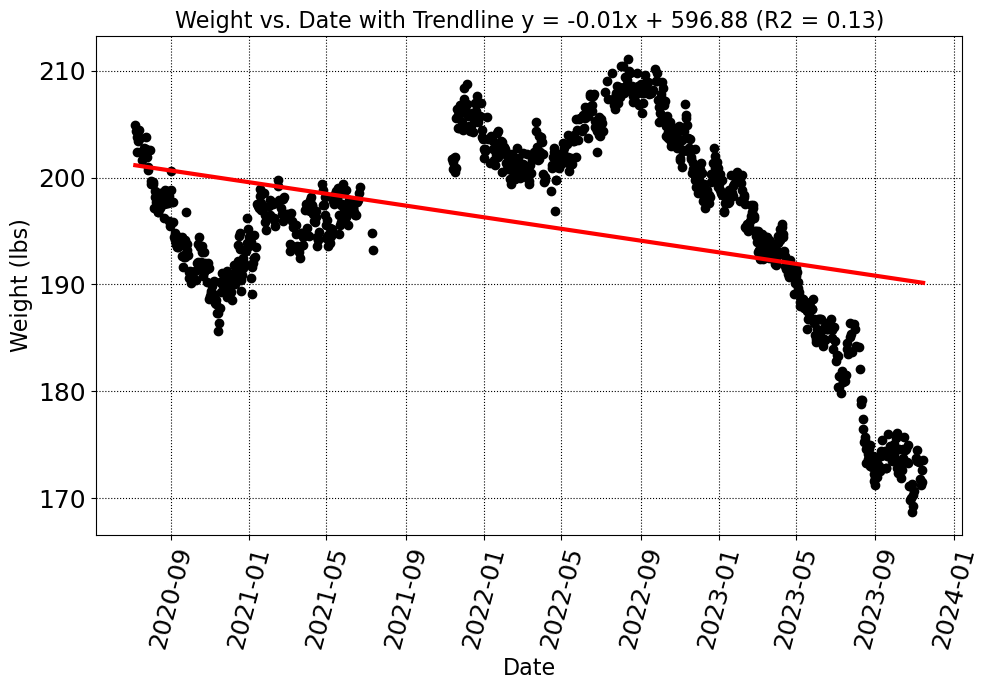

In [60]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X_string, y, color='black');
ax.plot(X_string, reg.predict(X), color='red',linewidth=3);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
plt.xticks(rotation=75)
ax.tick_params(labelsize = 18)
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('Weight (lbs)', fontsize = 16)
ax.set_title(
    "Weight vs. Date with Trendline y = {:.2f}x + {:.2f} (R2 = {:.2f})".format(
        m, b, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)